# Dog vs Cat Classification using Transfer Learning | Deep Learning
This project is focused on building a deep learning model to classify images of dogs and cats using a dataset from Kaggle.

## Project Overview
This project focuses on building an image classification model using deep learning to distinguish between images of dogs and cats. Leveraging the Dogs vs Cats dataset from Kaggle, the project uses a pre-trained MobileNetV2 model for transfer learning. The images are preprocessed, labeled, and then fed into the model, which is trained to classify the images with high accuracy. The model is also capable of predicting whether a given image is a dog or a cat.

## Problem Statement
The goal of this project is to develop an accurate and efficient machine learning model that can automatically classify images as either dogs or cats. With large volumes of image data becoming increasingly available, manual classification is time-consuming and prone to errors. By leveraging deep learning and transfer learning techniques, this project aims to create a model that can classify these images with high accuracy, providing a scalable solution to the problem of image-based animal classification. The challenge lies in processing and differentiating subtle features in images while ensuring generalizability across diverse data.

## Dataset
The **Dogs vs Cats** dataset, originally provided by Kaggle, contains 25,000 labeled images of dogs and cats in a balanced distribution (12,500 dog images and 12,500 cat images). The images vary in size, quality, and orientation, offering a realistic challenge for image classification models.
- _Training Data:_ The dataset includes 25,000 images for training, with filenames indicating the label (e.g., dog.123.jpg or cat.456.jpg).
- _Test Data:_ A separate test set is available for evaluating model performance.

Each image is labeled as either a dog or a cat, making this a binary classification problem. The dataset is well-suited for applying deep learning models, particularly convolutional neural networks (CNNs), due to its large size and visual complexity. For this project, the images were resized to a standard size (224x224 pixels) for consistent input into the neural network model.

In [125]:
#configure the path of Kaggle.json file

import os
import shutil

# Create the .kaggle directory if it does not exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json file to the .kaggle directory
shutil.copy('/kaggle/input/my-api/kaggle.json', '/root/.kaggle/kaggle.json')

# Set the permissions for the kaggle.json file
os.chmod('/root/.kaggle/kaggle.json', 0o600)

## Data Collection and Processing

In [126]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [127]:
!ls

dogs-vs-cats.zip  sampleSubmission.csv	train
image_resized	  test1.zip		train.zip


In [128]:
# Extract the zip file
from zipfile import ZipFile

dataset = '/kaggle/working/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("The dataset is extracted")

The dataset is extracted


In [129]:
# Extract the zip file
from zipfile import ZipFile

dataset = '/kaggle/working/train.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("The dataset is extracted")

The dataset is extracted


In [130]:
# Counting the no. of iles in train folder
path, dirs, files = next(os.walk('/kaggle/working/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [131]:
# Printing the name of images
file_names = os.listdir("/kaggle/working/train")
print(file_names)

['cat.885.jpg', 'dog.697.jpg', 'dog.3333.jpg', 'dog.4876.jpg', 'cat.8792.jpg', 'cat.4990.jpg', 'cat.5774.jpg', 'cat.11395.jpg', 'cat.5385.jpg', 'cat.10284.jpg', 'cat.8213.jpg', 'cat.8462.jpg', 'cat.1236.jpg', 'cat.6037.jpg', 'dog.6388.jpg', 'dog.3663.jpg', 'cat.8283.jpg', 'dog.11060.jpg', 'dog.4192.jpg', 'dog.10459.jpg', 'cat.5927.jpg', 'cat.5804.jpg', 'cat.7288.jpg', 'dog.12220.jpg', 'dog.1545.jpg', 'cat.10893.jpg', 'cat.8187.jpg', 'cat.6850.jpg', 'cat.470.jpg', 'cat.10955.jpg', 'dog.5429.jpg', 'dog.8111.jpg', 'cat.3339.jpg', 'dog.3835.jpg', 'dog.1655.jpg', 'cat.1094.jpg', 'cat.9431.jpg', 'cat.7770.jpg', 'cat.3047.jpg', 'dog.5035.jpg', 'dog.417.jpg', 'dog.11844.jpg', 'cat.9606.jpg', 'dog.10153.jpg', 'dog.9631.jpg', 'cat.3395.jpg', 'dog.11848.jpg', 'dog.1502.jpg', 'dog.11851.jpg', 'dog.5834.jpg', 'cat.4787.jpg', 'dog.11093.jpg', 'cat.75.jpg', 'dog.8371.jpg', 'cat.2945.jpg', 'dog.4707.jpg', 'dog.5879.jpg', 'dog.9465.jpg', 'cat.9956.jpg', 'dog.1409.jpg', 'dog.8346.jpg', 'cat.9960.jpg', '

## Import libraries

In [132]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

import cv2
from IPython.display import display, Image

import glob

import tensorflow as tf
import tensorflow_hub as hub

from PIL import Image
import os

## Display images of dogs and cats

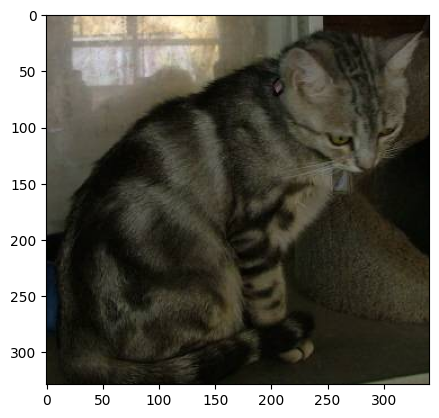

In [133]:
img = mpimg.imread('/kaggle/working/train/cat.9154.jpg')
imgplot = plt.imshow(img)
plt.show()

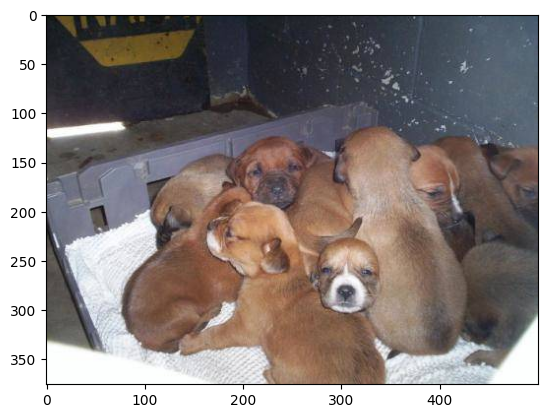

In [134]:
img = mpimg.imread('/kaggle/working/train/dog.11183.jpg')
imgplot = plt.imshow(img)
plt.show()

In [135]:
file_names = os.listdir("/kaggle/working/train")

for i in range(5):
    
    name = file_names[i]
    print(name[0:3])

cat
dog
dog
dog
cat


In [136]:
# Initialize counters
dog_count = 0
cat_count = 0

file_names = os.listdir("/kaggle/working/train")

for img in file_names:
    
    name = img[0:3]
    
    if name == 'dog':
        dog_count += 1
        
    else:
        cat_count += 1
        
print('Number of dog images =:', dog_count)
print('Number of cat images =:', cat_count)

Number of dog images =: 12500
Number of cat images =: 12500


## Resizing all the images

In [137]:
# Create a directory of resized images
#os.mkdir('/kaggle/working/image resized')

In [138]:
original_folder = '/kaggle/working/train/'
resized_folder = '/kaggle/working/image_resized/'

# Create resized_folder if it doesn't exist
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

# Process the first 2000 images
for i in range(min(2000, len(os.listdir(original_folder)))):
    filename = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, filename)
    
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    
    newImgPath = os.path.join(resized_folder, filename)
    img.save(newImgPath)


In [139]:
# List all files in the resized folder
resized_folder = '/kaggle/working/image_resized/'
files = os.listdir(resized_folder)
print("Files in resized folder:", files)

Files in resized folder: ['cat.885.jpg', 'dog.697.jpg', 'dog.3333.jpg', 'dog.4876.jpg', 'cat.8792.jpg', 'cat.4990.jpg', 'cat.5774.jpg', 'cat.11395.jpg', 'cat.5385.jpg', 'cat.10284.jpg', 'cat.8213.jpg', 'cat.8462.jpg', 'cat.1236.jpg', 'cat.6037.jpg', 'dog.6388.jpg', 'dog.3663.jpg', 'cat.8283.jpg', 'dog.11060.jpg', 'dog.4192.jpg', 'dog.10459.jpg', 'cat.5927.jpg', 'cat.5804.jpg', 'cat.7288.jpg', 'dog.12220.jpg', 'dog.1545.jpg', 'cat.10893.jpg', 'cat.8187.jpg', 'cat.6850.jpg', 'cat.470.jpg', 'cat.10955.jpg', 'dog.5429.jpg', 'dog.8111.jpg', 'cat.3339.jpg', 'dog.3835.jpg', 'dog.1655.jpg', 'cat.1094.jpg', 'cat.9431.jpg', 'cat.7770.jpg', 'cat.3047.jpg', 'dog.5035.jpg', 'dog.417.jpg', 'dog.11844.jpg', 'cat.9606.jpg', 'dog.10153.jpg', 'dog.9631.jpg', 'cat.3395.jpg', 'dog.11848.jpg', 'dog.1502.jpg', 'dog.11851.jpg', 'dog.5834.jpg', 'cat.4787.jpg', 'dog.11093.jpg', 'cat.75.jpg', 'dog.8371.jpg', 'cat.2945.jpg', 'dog.4707.jpg', 'dog.5879.jpg', 'dog.9465.jpg', 'cat.9956.jpg', 'dog.1409.jpg', 'dog.834

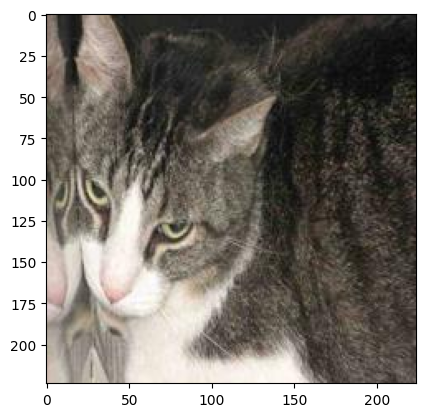

In [140]:
# Display resized Cat image
img = mpimg.imread('/kaggle/working/image_resized/cat.4971.jpg')
imgplot = plt.imshow(img)
plt.show()

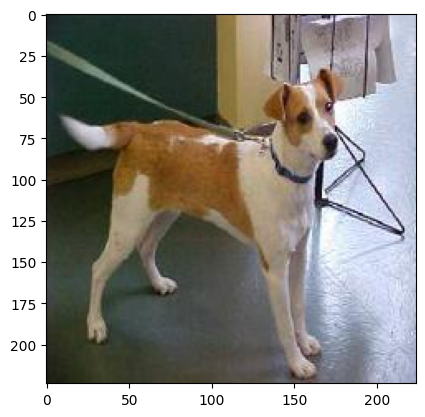

In [141]:
# Display resized dog image
img = mpimg.imread('/kaggle/working/image_resized/dog.5578.jpg')
imgplot = plt.imshow(img)
plt.show()

## Creating labels for resized images of dogs and cats
- Cats = 0
- Dogs = 1

In [142]:
# Create a for loop to assign labels
filenames = os.listdir('/kaggle/working/image_resized/')

labels =[]

for i in range(2000):
    
    file_name = filenames[i]
    label = file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    
    else:
        labels.append(0)

In [143]:
print(filenames[0:5])
print(len(filenames))

['cat.885.jpg', 'dog.697.jpg', 'dog.3333.jpg', 'dog.4876.jpg', 'cat.8792.jpg']
2000


In [144]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 0]
2000


In [145]:
# Count the images of dogs and cats out of the 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1039  961]


## Convert resized images to numpy array

In [146]:
image_directory = '/kaggle/working/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dof_cat_images = np.asarray([cv2.imread(file) for file in files])

In [147]:
print(dof_cat_images)

[[[[204 188 146]
   [204 188 146]
   [205 189 147]
   ...
   [ 82  80  70]
   [100  94  83]
   [112 106  95]]

  [[204 188 146]
   [204 188 146]
   [205 189 147]
   ...
   [ 79  77  67]
   [104  98  87]
   [123 117 106]]

  [[204 188 146]
   [204 188 146]
   [204 188 146]
   ...
   [ 70  68  58]
   [101  95  84]
   [126 120 109]]

  ...

  [[172 186 182]
   [172 186 182]
   [171 185 181]
   ...
   [222 228 227]
   [221 227 226]
   [221 227 226]]

  [[172 186 182]
   [172 186 182]
   [171 185 181]
   ...
   [222 228 227]
   [223 229 228]
   [223 229 228]]

  [[172 186 182]
   [172 186 182]
   [172 186 182]
   ...
   [223 229 228]
   [223 229 228]
   [224 230 229]]]


 [[[244 244 244]
   [243 243 243]
   [242 242 242]
   ...
   [249 249 249]
   [249 249 249]
   [249 249 249]]

  [[247 247 247]
   [245 245 245]
   [244 244 244]
   ...
   [249 249 249]
   [249 249 249]
   [249 249 249]]

  [[250 250 250]
   [247 247 247]
   [246 246 246]
   ...
   [249 249 249]
   [249 249 249]
   [249 249

In [148]:
type(dof_cat_images)

numpy.ndarray

In [149]:
print(dof_cat_images.shape)

(2000, 224, 224, 3)


In [150]:
X = dof_cat_images
Y = np.asarray(labels)

## Train Test Split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [152]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


- Train images = 1600
- Test images = 400

In [153]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [154]:
print(X_train_scaled)

[[[[0.77254902 0.85882353 0.88235294]
   [0.77254902 0.85882353 0.88235294]
   [0.77647059 0.8627451  0.88627451]
   ...
   [0.90980392 0.9372549  0.9254902 ]
   [0.90196078 0.93333333 0.93333333]
   [0.84705882 0.88627451 0.88627451]]

  [[0.78039216 0.86666667 0.89019608]
   [0.78039216 0.86666667 0.89019608]
   [0.78431373 0.87058824 0.89411765]
   ...
   [0.90588235 0.93333333 0.92156863]
   [0.90980392 0.94117647 0.94117647]
   [0.88235294 0.92156863 0.92156863]]

  [[0.78823529 0.8627451  0.89019608]
   [0.78823529 0.8627451  0.89019608]
   [0.79215686 0.86666667 0.89411765]
   ...
   [0.89803922 0.91764706 0.90980392]
   [0.90980392 0.92941176 0.93333333]
   [0.91372549 0.94509804 0.94509804]]

  ...

  [[0.83137255 0.80784314 0.81176471]
   [0.85490196 0.83137255 0.83529412]
   [0.85098039 0.82745098 0.83137255]
   ...
   [0.69803922 0.6627451  0.65098039]
   [0.72156863 0.68627451 0.67058824]
   [0.74117647 0.70588235 0.69019608]]

  [[0.85490196 0.83137255 0.83529412]
   [0.8

## Building the Neural Network

In [155]:
# Download the MobileNet model
#mobilenet_model = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector")

# Create a Keras layer from the downloaded model
#pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)


In [156]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [157]:
# Load pre-trained MobileNetV2 model
pretrained_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Build the model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = pretrained_model(inputs)  # Pass inputs to the pre-trained model
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Add global pooling
outputs = tf.keras.layers.Dense(num_of_classes, activation='softmax')(x)  # Classification layer

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [158]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [159]:
model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - acc: 0.8348 - loss: 0.4041
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - acc: 0.9499 - loss: 0.1310
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - acc: 0.9793 - loss: 0.0576
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - acc: 0.9787 - loss: 0.0615
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - acc: 0.9789 - loss: 0.0606
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - acc: 0.9867 - loss: 0.0455
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 229s 5s/step - acc: 0.9867 - loss: 0.0432
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - acc: 0.9865 - loss: 0.0426
Epoch 9/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - acc: 0.9894 - loss: 0.0348
Epoch 10/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - acc: 0.9831 - loss: 0.0426
Epoch 11/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - acc: 0.9716 - loss: 0.0887
Epoch 12/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - acc: 0.9875 - loss: 0.0317
Epoch 13/15
50/50 ━━━━━━━━━━━━━━━━━━━

In [160]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 663ms/step - acc: 0.8571 - loss: 2.3085
Test Loss = 2.137030601501465
Test Accuracy = 0.862500011920929


## Building a Predictive System

Path of the image to be predicted:  /kaggle/input/cat-dog/Dog.JPG


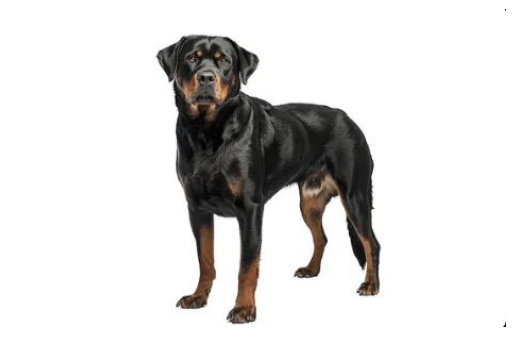

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[4.960881e-19 1.000000e+00]]
1
The image represents a dog


In [164]:
# Load and preprocess image
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Convert BGR (OpenCV default) to RGB for proper display in matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Resize the image to 224x224 as required by the model
input_image_resize = cv2.resize(input_image, (224, 224))

# Scale pixel values to the range [0, 1]
input_image_scaled = input_image_resize / 255.0

# Reshape the image to fit the model input requirements
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Perform prediction
input_prediction = model.predict(image_reshaped)

print(input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

# Display the prediction result
if input_pred_label == 0:
    print('The image represents a cat')
else:
    print('The image represents a dog')


Path of the image to be predicted:  /kaggle/input/cat-dog/Cat.JPG


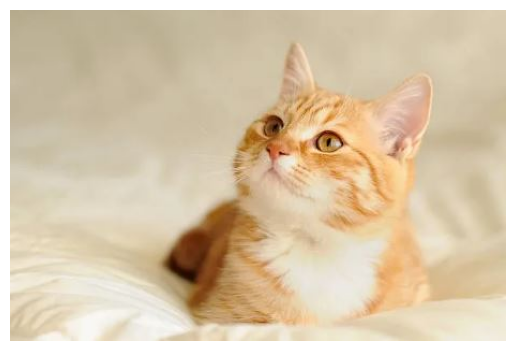

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[1.000000e+00 6.513504e-13]]
0
The image represents a cat


In [165]:
# Load and preprocess image
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

# Convert BGR (OpenCV default) to RGB for proper display in matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Resize the image to 224x224 as required by the model
input_image_resize = cv2.resize(input_image, (224, 224))

# Scale pixel values to the range [0, 1]
input_image_scaled = input_image_resize / 255.0

# Reshape the image to fit the model input requirements
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Perform prediction
input_prediction = model.predict(image_reshaped)

print(input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

# Display the prediction result
if input_pred_label == 0:
    print('The image represents a cat')
else:
    print('The image represents a dog')
